In [1]:
import librosa.display
import os
from tqdm import tqdm_notebook as tqdm
import glob
from collections import defaultdict
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gc
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
MFCC_MAX_LEN = 1000
NUM_CEPSTRUM = 23

In [3]:
path = '/DriveE/linux/data/'

train_filename_list = glob.glob(os.path.join(path, '*train-clean*'))
test_filename_list = glob.glob(os.path.join(path, '*test-clean*'))

#train_filename_list

# Helper function

In [4]:
obj_path = os.path.join(path, 'obj/')
def save_obj(obj, name ):
    with open(obj_path + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open(obj_path + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [5]:
def get_features_from_text(txt):
    features = defaultdict(list)
    spk_list = set()
    uttid_list = []
    spk2utt = defaultdict(list)
    for line in tqdm(txt):
        if ('[' in line):
            uttid = line.split()[0]
            spk, chapter, utt_num = uttid.split('-')
            spk_list.add(spk)
            uttid_list.append(uttid)
            spk2utt[spk].append(uttid)
        elif (']' in line):
            features[uttid].append([float(x) for x in line[:-1].split()])
        else:
            features[uttid].append([float(x) for x in line.split()])
    return features, spk_list, uttid_list, spk2utt

In [23]:
def clean_mfcc(mfcc):
    if (MFCC_MAX_LEN > mfcc.shape[1]):
        # padding 
        pad_width = MFCC_MAX_LEN - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        # cutoff
        mfcc = mfcc[:,:MFCC_MAX_LEN]
    return mfcc

def feature_scaling(mfcc):
    # Standardization with CMVN
    mean = np.mean(mfcc,axis=1).reshape(23,1)
    std = np.std(mfcc,axis=1).reshape(23,1)
    return (mfcc - mean)/std

def convert_to_mfcc(features):
    mfccs = {}
    for uttid in features.keys():
        mfcc = np.array(features[uttid]).T # shape (num_ceptrum, timestep)
        mfcc = feature_scaling(mfcc)
        assert mfcc.shape[0] == 23
        mfccs[uttid] = mfcc
    return mfccs

def get_timestep_data(mfccs):
    timestep_list = []
    for uttid in mfccs.keys():
        mfcc = mfccs[uttid]
        assert mfcc.shape[0] == 23
        timestep_list.append(mfcc.shape[1])
    return timestep_list

def clean_and_save_mfcc(mfccs):
    for uttid in mfccs.keys():
        mfcc = mfccs[uttid]
        assert mfcc.shape[0] == 23
        mfcc = clean_mfcc(mfcc).T # shape (timestep, num_ceptrum)
        save_obj(mfcc, uttid)

In [24]:
def manage_dataset(dataset):
    if (dataset == 'train'):
        datapath_list = train_filename_list
    elif (dataset == 'test'):
        datapath_list = test_filename_list
    assert len(datapath_list) > 0
    
    spk2utt = defaultdict(list)
    timesteps_list = []
    for filepath in datapath_list:
        with open(filepath) as f:
            filename = os.path.basename(filepath)
            print(filename)
            
            # read text files from kaldi 
            txt = [line.strip() for line in f.readlines()]
            
            # extract features from text
            features, spk_list, uttid_list, spk2utt_sub = get_features_from_text(txt)
            
            # convert features to np.array
            mfccs = convert_to_mfcc(features)
            
            timesteps = get_timestep_data(mfccs)
            timesteps_list.extend(timesteps)
            
            # save mfcc to pickle
            clean_and_save_mfcc(mfccs)
            
            filename_pkl = filename[:-3] + 'pkl'
            for spk in spk2utt_sub.keys():
                spk2utt[spk].extend(spk2utt_sub[spk])
    save_obj(spk2utt, 'spk2utt_' + dataset)
    save_obj(timesteps_list, 'timesteps')

In [25]:
manage_dataset('train')

raw_mfcc_train-clean.23.txt



raw_mfcc_train-clean.24.txt



raw_mfcc_train-clean.25.txt



raw_mfcc_train-clean.26.txt



raw_mfcc_train-clean.27.txt



raw_mfcc_train-clean.28.txt



raw_mfcc_train-clean.29.txt



raw_mfcc_train-clean.3.txt



raw_mfcc_train-clean.30.txt



raw_mfcc_train-clean.31.txt



raw_mfcc_train-clean.32.txt



raw_mfcc_train-clean.33.txt



raw_mfcc_train-clean.34.txt



raw_mfcc_train-clean.35.txt



raw_mfcc_train-clean.36.txt



raw_mfcc_train-clean.37.txt



raw_mfcc_train-clean.38.txt



raw_mfcc_train-clean.39.txt



raw_mfcc_train-clean.4.txt



raw_mfcc_train-clean.40.txt



raw_mfcc_train-clean.5.txt



raw_mfcc_train-clean.6.txt



raw_mfcc_train-clean.7.txt



raw_mfcc_train-clean.8.txt



raw_mfcc_train-clean.9.txt



raw_mfcc_train-clean.1.txt



raw_mfcc_train-clean.10.txt



raw_mfcc_train-clean.11.txt



raw_mfcc_train-clean.12.txt



raw_mfcc_train-clean.13.txt



raw_mfcc_train-clean.14.txt



raw_mfcc_train-clean.15.txt



raw_mfcc_train-clean.16.txt



raw_mfcc_train-clean.17.txt



raw_mfcc_train-clean.18.txt



raw_mfcc_train-clean.19.txt



raw_mfcc_train-clean.2.txt



raw_mfcc_train-clean.20.txt



raw_mfcc_train-clean.21.txt



raw_mfcc_train-clean.22.txt


In [23]:
#manage_dataset('test')

raw_mfcc_test-clean.1.txt



raw_mfcc_test-clean.10.txt



raw_mfcc_test-clean.11.txt



raw_mfcc_test-clean.12.txt



raw_mfcc_test-clean.13.txt



raw_mfcc_test-clean.14.txt



raw_mfcc_test-clean.15.txt



raw_mfcc_test-clean.16.txt



raw_mfcc_test-clean.17.txt



raw_mfcc_test-clean.18.txt



raw_mfcc_test-clean.19.txt



raw_mfcc_test-clean.2.txt



raw_mfcc_test-clean.20.txt



raw_mfcc_test-clean.21.txt



raw_mfcc_test-clean.23.txt



raw_mfcc_test-clean.24.txt



raw_mfcc_test-clean.25.txt



raw_mfcc_test-clean.26.txt



raw_mfcc_test-clean.27.txt



raw_mfcc_test-clean.28.txt



raw_mfcc_test-clean.29.txt



raw_mfcc_test-clean.3.txt



raw_mfcc_test-clean.30.txt



raw_mfcc_test-clean.31.txt



raw_mfcc_test-clean.32.txt



raw_mfcc_test-clean.33.txt



raw_mfcc_test-clean.34.txt



raw_mfcc_test-clean.35.txt



raw_mfcc_test-clean.37.txt



raw_mfcc_test-clean.38.txt



raw_mfcc_test-clean.39.txt



raw_mfcc_test-clean.4.txt



raw_mfcc_test-clean.40.txt



raw_mfcc_test-clean.5.txt



raw_mfcc_test-clean.6.txt



raw_mfcc_test-clean.7.txt



raw_mfcc_test-clean.8.txt



raw_mfcc_test-clean.9.txt



raw_mfcc_test-clean.22.txt



raw_mfcc_test-clean.36.txt


# Load Dict

In [35]:
spk2utt_train = load_obj('spk2utt_train')
# spk2utt_test = load_obj('spk2utt_test')
timesteps_list = load_obj('timesteps')

In [28]:
#spk2utt_train

In [14]:
#spk2utt_test

# Example MFCC after feature scaling with CMVN

In [29]:
example_mfcc = load_obj('1098-133695-0091')
example_mfcc.shape

(1000, 23)

In [30]:
def plot_mfcc(mfcc):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

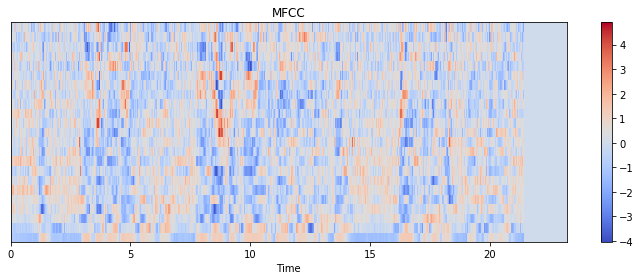

In [31]:
plot_mfcc(example_mfcc.T)

# Data Analysis

In [32]:
class_len = []
classes = []

for spk in spk2utt_train:
    classes.append((spk, len(spk2utt_train[spk])))
df = pd.DataFrame(classes, columns=['speaker_id', 'utt_total'])

In [33]:
df.sort_values('utt_total')

,speaker_id,utt_total
76,7312,26
140,1992,56
243,445,60
229,1183,66
89,8014,76
233,4214,81
161,1040,81
246,458,82
178,289,86
62,6925,86


In [41]:
print("Number of training data is {}".format(len(timesteps_list)))

Number of training data is 28539


Text(0,0.5,'samples')

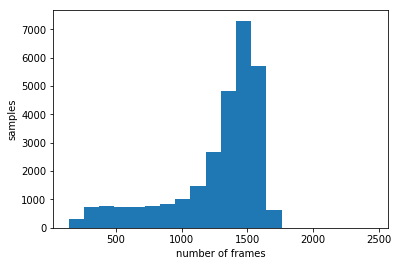

In [53]:
plt.hist(timesteps_list, bins=20)
plt.xlabel('number of frames')
plt.ylabel('samples')

# Prepare Data for training model

In [84]:
spk2labels = {}
num_speakers = 0
for spk in sorted(spk2utt_train.keys()):
    spk2labels[spk] = num_speakers
    num_speakers += 1

In [85]:
#spk2labels

In [86]:
#spk2utt_train

Prepare X and y

In [87]:
X_list = []
y_list = []
labels = {}
for spk in spk2utt_train.keys():
    X_list.extend(spk2utt_train[spk])
    label = spk2labels[spk]
    for i, uttid in enumerate(spk2utt_train[spk]):
        y_list.append(label)
        labels[uttid] = label

In [88]:
#X_list[1520:1525]

In [89]:
#y_list[1520:1525]

In [90]:
labels

{'481-123720-0012': 137,
 '481-123720-0013': 137,
 '481-123720-0014': 137,
 '481-123720-0015': 137,
 '481-123720-0016': 137,
 '481-123720-0017': 137,
 '481-123720-0018': 137,
 '481-123720-0019': 137,
 '481-123720-0020': 137,
 '481-123720-0021': 137,
 '481-123720-0022': 137,
 '481-123720-0023': 137,
 '481-123720-0024': 137,
 '481-123720-0025': 137,
 '481-123720-0026': 137,
 '481-123720-0027': 137,
 '481-123720-0028': 137,
 '481-123720-0029': 137,
 '481-123720-0030': 137,
 '481-123720-0031': 137,
 '481-123720-0032': 137,
 '481-123720-0033': 137,
 '481-123720-0034': 137,
 '481-123720-0035': 137,
 '481-123720-0036': 137,
 '481-123720-0037': 137,
 '481-123720-0038': 137,
 '481-123720-0039': 137,
 '481-123720-0040': 137,
 '481-123720-0041': 137,
 '481-123720-0042': 137,
 '481-123720-0043': 137,
 '481-123720-0044': 137,
 '481-123720-0045': 137,
 '481-123720-0046': 137,
 '481-123720-0047': 137,
 '481-123720-0048': 137,
 '481-123720-0049': 137,
 '481-123720-0050': 137,
 '481-123720-0051': 137,


In [91]:
X_train, X_val, y_train, y_val = train_test_split(X_list, y_list, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)
assert len(np.unique(np.array(y_val)))

In [92]:
partition = {}
partition['train'] = X_train
partition['validation'] = X_val

In [93]:
partition['validation']

['8797-294123-0061',
 '405-130894-0014',
 '6531-61334-0116',
 '1743-142913-0008',
 '328-129766-0072',
 '7402-90848-0026',
 '3857-180923-0011',
 '7402-90848-0053',
 '6064-56165-0034',
 '8770-295462-0019',
 '5390-30102-0005',
 '1578-140049-0001',
 '441-128982-0017',
 '4214-7146-0036',
 '7178-34644-0069',
 '2092-145709-0019',
 '8238-274553-0031',
 '8088-284756-0074',
 '250-142286-0028',
 '3947-13260-0026',
 '426-122821-0040',
 '5688-41232-0031',
 '6454-107462-0017',
 '3982-182255-0008',
 '4406-16883-0015',
 '3857-180923-0028',
 '150-126112-0001',
 '233-134440-0015',
 '3526-175658-0023',
 '911-128684-0067',
 '1334-135589-0087',
 '6147-34606-0032',
 '328-129766-0042',
 '4680-16026-0019',
 '8465-246940-0005',
 '1898-145715-0022',
 '4406-16882-0041',
 '4853-29413-0026',
 '5514-19192-0000',
 '3982-178459-0031',
 '7067-76047-0045',
 '5339-14133-0039',
 '8108-280359-0020',
 '5808-48608-0060',
 '1867-154071-0019',
 '2817-142371-0030',
 '5022-29411-0029',
 '4137-11701-0039',
 '6147-34607-0037',
 '

## Data Generator

In [94]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(1000,23), n_channels=1,
                 n_classes=num_speakers, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        #print(list_IDs_temp)
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = load_obj(ID)

            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

Using TensorFlow backend.
/home/punch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/punch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/punch/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/punch/anaconda3/lib/python3.7/site-packages/tensorflo

# Keras script

In [97]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, CSVLogger, ModelCheckpoint, LambdaCallback
from keras import backend as K 

K.clear_session()
# Parameters
params = {'dim': (MFCC_MAX_LEN, NUM_CEPSTRUM),
          'batch_size': 16,
          'n_classes': count,
          'n_channels': 1,
          'shuffle': True}

# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

# Design model
model = Sequential()
model.add(Conv1D(256, 5, border_mode='valid', input_shape=(MFCC_MAX_LEN, NUM_CEPSTRUM)))
model.add(MaxPooling1D(pool_size=5, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(128, 3, border_mode='valid'))
model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(64, 3, border_mode='valid'))
model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=256, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=251, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.0005),
              metrics=['accuracy'])
model.summary()

# checkpoint
filepath="model2.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001, verbose=1)
# Train model on dataset
history = model.fit_generator(generator=training_generator,
                    epochs=50,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    callbacks=[reduce_lr, early_stopping],
                    verbose=1,
                    workers=10)
model.save(filepath)

/home/punch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(256, 5, input_shape=(1000, 23), padding="valid")`
/home/punch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(128, 3, padding="valid")`
/home/punch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, 3, padding="valid")`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 996, 256)          29696     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 992, 256)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 992, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 990, 128)          98432     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 988, 128)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 988, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 986, 64)          

In [32]:
# ใช้เวลาให้น้อยลงโดยการลด frame

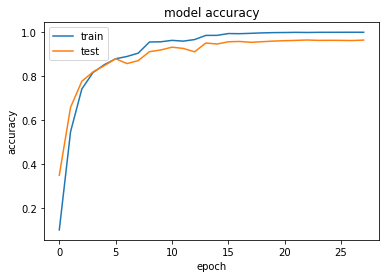

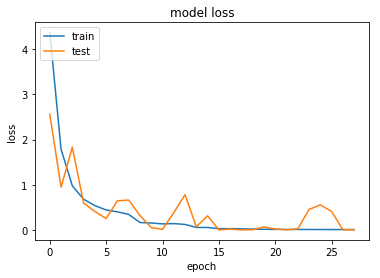

In [98]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Error Analysis

In [ ]:
import soundfile as sf
from IPython.display import Audio, clear_output, display
sampling_rate = 16000